# Projeto Previsão de Ações

## Análise de Séries Temporais - Parte II

Todos os detalhes sobre o conjunto de dados utilizado está descrito no notebook **Análise de Séries Temporais - Parte I**.

In [1]:
#libs
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
%matplotlib inline

import statsmodels.tsa as tsa
import statsmodels.tsa.statespace.sarimax as sm
from scipy.stats import chi2

from itertools import product 

## Modelos de Séries Temporais

### Modelos autorregressiovos AR(p)

Em um modelo autorregressivo o valor de $Z_t$ no período $t$ depende do seu valor em $p$ períodos anteriores e de um termo aleatório, os valores de $Z_t$ são definidos como desvios em relação a um valor médio. Por definição, temos que um modelo autorregressivo de ordem $p$, AR($p$) é expresso por:

<div style="text-align:center">
$\tilde{Z}_t = \alpha_1\tilde{Z}_{t-1} + \alpha_2\tilde{Z}_{t-2} + \cdots + \alpha_p\tilde{Z}_{t-p} + \epsilon_t$
</div>

Em que: $\tilde{Z}_t = Z_t - \mu$, $\alpha_1, \alpha_2, \cdots, \alpha_p$ são parâmetros reais e $\epsilon_t$ é um erro aleatório i.i.d com $E[\epsilon_t] = 0$ e $Var[\epsilon_t] = \sigma^2$.


Um caso importante que merece destaque é que nesse tipo de modelo os dados falam por si, os seja, apenas os valores de $Z_t$ são necessário para modelar o fenômeno, não existe outros regressores.

### Modelos de médias móveis MA(q)

Um processo de média móvel de ordem $q$, chamado de MA($q$) é definido por:

<div style="text-align:center">
$Z_t = \mu + \epsilon_t - \beta_1\epsilon_{t-1} - \cdots - \beta_q\epsilon_{t-q}$
</div>

em que $\mu$ é uma constante e $\epsilon$, como antes, é um termo de erro estocástico de ruído branco. Aqui $Z$ no
período $t$ é igual a uma constante mais uma média móvel dos termos de erro atuais e passados.

### Modelos autorregressivos e de médias móveis ARMA(p,q)

Para uma grande parte de fenômenos se quisermos um modelo parcimonioso, a inclusão de termos autorregressivos e de médias móveis é a melhor solução. Neste caso, $Z$ possui características tanto de AR quanto de MA. Uma série temporal $Z_t$ segue um processo ARMA($p,q$) se pode ser escrito na forma:

<div style="text-align:center">
$\tilde{Z}_t = \alpha_1\tilde{Z}_{t-1} + \cdots + \alpha_p\tilde{Z}_{t-p} + \epsilon_t - \beta_1\epsilon_{t-1} - \cdots - \beta_q\epsilon_{t-q}$
</div>

### Modelos autorregressivos integrado de médias móveis ARIMA(p,d,q)

Estes modelos discutidos anteriormente levam em consideração o pressuposto de que a série temporal envolvida é estacionária ou, ao menos, fracamente estacionária, porém muitas séries temporais não são estacionárias, ou seja, são *integradas*, como foi levantado na **Part I**. Uma série é integrada de ordem 1 se suas primeiras diferenças forem estacionárias e ele é *integrada* de ordem $d$ se suas $d$ diferenças forem estacionárias. 

Se temos que diferenciar uma série temporal $d$ vezes para que ela seja estacionária e aplicar-lhe o modelo ARMA ($p, q$), então esta série temporal original será um processo ARIMA ($p, d, q$), ou seja, ela é uma série temporal autorregressiva integrada de médias móveis, em que $p$ retrata os números dos termos autorregressivos, $d$ o número de vezes que a série deve ser diferenciada antes de se tornar estacionária e $q$ o número de termos de média móvel. A forma mais usual do modelo ARIMA é dada por:

<div style="text-align:center">
$Z_t = \phi_1Z_{t-1} + \cdots + \phi_{p+d}Z_{t-p-d} + \epsilon_t - \theta_1\epsilon_{t-1} - \cdots - \theta_q\epsilon_{t-q}$
</div>

### Modelos sazonais - Modelos sazonais autorregressivos integrado de médias móveis SARIMA(p,d,q)(P,D,Q)S

Um dos modelos mais utilizados que consideram a sazonalidade de uma determinada série temporal, é o chamado modelo ARIMA sazonal, ou SARIMA. Quando a sazonalidade não é determinística os modelos SARIMA captam esse efeito quando ele é multiplicativo, quando ele é aditivo se utiliza filtros pré-ARIMA. Quando temos um período sazonal *S*, o modelo denominado SARIMA de ordem ($p,d,q$)×($P,D,Q$)$S$, é dado por:

<div style="text-align:center">
$ \phi(B)\Phi(B^S)\Delta^d\Delta^{D}_SZ_t = \theta(B)\Theta(B^S)\epsilon_t$
</div>

Em que, $\phi(B)$, é o operador não sazonal auto-regressivo,  $\phi$ são parâmetros auto-regressivo
não-sazonais, $\Delta^d  =(1-B)d$, é o operador  diferença  não  sazonal  de  ordem  d,  $\Phi(B^S)$ é o operador sazonal auto-regressivo, $\Phi$,são parâmetros auto-regressivo sazonais, $\Delta^{D}_S =(1-B^S)D$, é operador  diferença  sazonal  de  ordem  D, $\theta(B)$ é o operador  não  sazonal de  médias  móveis, $\theta$ são parâmetros  de  médias  móveis  não  sazonais, $\Theta(B^S)$ é o operador sazonal de médias móveis, $\Theta$ são parâmetros de médias móveis sazonais.



### A metodologia Box-Jenkins

Essa metodologia nos ajusda a responder a seguinte questão: tendo uma série temporal qual o modelo mais indicado para modelar o fenômeno estudado? Essa metodologia é dividida em quatro etapas:

#### *Identificação* 

Nesta etapa temos que descobrir quais os valores adequados de $p, d$ e $q$, podemos fazer isso com  a função de autocorrelação e autocorrelação parcial.

Analisando a série temporal do número de processos da "XXXX" no período de janeiro de 2010 há dezembro de 2017 exibimos o correlograma com os dados da ACF e PACF.  A ACF decresce muito lentamente, até cerca de 27 defasagens (lags), as ACF são individuais, significativamente diferentes de zero, por estarem todas fora dos intervalos de 95% de confiança. Em segundo lugar, depois da sétima defasagem, a função parcial de autocorrelação cai dramaticamente e a maioria das funções parciais, após a defasagem 7, são estatisticamente insignificantes, com exceção de algumas defasagem. 

Uma vez que a série temporal do número de processos da "XXXXX" não é estacionária, temos de torná-la estacionária antes de aplicar a metodologia Box-Jenkins. Aplicamos as primeiras diferenças e não observamos nenhuma tendência nessa nova série, talvez sugerindo que a série temporal em primeiras diferenças seja estacionária. Uma aplicação formal do teste de raiz unitária Dickey-Fuller mostra que isso é, de fato, o que acontece.

Agora, temos um padrão bem diferente da função de autocorrelação e da função de autocorrelação parcial. As funções de autocorrelação nas defasagens iniciais parecem estatisticamente diferentes a partir de zero. Mas, em todas as outras defasagens, eles não são estatisticamente diferentes de zero. Para as correlações parciais, apenas as defasagens iniciais parecem ser estatisticamente diferentes de zero.

Uma maneira de realizar isso é considerar a função de autocorrelação, a função de autocorrelação parcial e os correlogramas associados de um número selecionado de processos de ARMA como AR(1), AR(2), MA(1), MA(2), ARMA(1, 1), ARMA(2, 2) etc. Uma vez que cada um desses processos estocásticos exibe padrões típicos da função de autocorrelação e da função de autocorrelação parcial, se a série temporal em estudo ajusta-se a um desses padrões, podemos identificar a série temporal com aquele processo. Naturalmente, teremos de aplicar os testes de diagnósticos para descobrir se o modelo ARMA selecionado é razoavelmente preciso.

|Tipo de modelo|Padrão típico de ACF|Padrão típico de PACF|
|---|---|---|
|AR(p)|Decai exponencialmente e/ou com padrão de onda senóide amortecida, infinita em extensão.|Picos significativos até *p* defasagens (lags). |
|MA(q)| É finita, tem picos significativos até q defasangens (lags), apresenta um corte após o lag *q*.|Decai exponencialmente e/ou com padrão de onda senóide amortecida.|
|ARMA(p,q)| Infinita em extensão, Decai exponencialmente e/ou com padrão de onda senóide amortecida após o lag $q - p$. |Decai exponencialmente e/ou com padrão de onda senóide amortecida.|

Devido a dificuldade de escolher o melhor modelo, podemos testar vários modelos com diferentes parametrizações e escolher o que melhor descreve o fenômeno.

#### *Estimação*


A estimação dos modelos de séries temporais pode ser realizada pelo método dos momentos, pela máxima verossimilhança ou outros métodos mais específicos como a representação de Hamilton, não entraremos em detalhes estatísticos aqui.

Vamos modelar essa série temporal de 3 formas diferentes, vamos ajustar primeiro um modelo SARIMA($p,d,q$)($P,D,Q$)$12$, considerando a janela sazonal de 12 meses.

Então primeiro vamos criar um grid com todos os possíveis valores de $p, \;d, \;e\; q$ e $P, \;D, \;e\; Q$, já temos uma ideia pelo gráfico de PACF, que precisamos de um valor de $p=2$ e um valor de $d=1$. Porém, vamos testar um range maior de valores e pelo Critério de Informação de Akaike-AIC, escolher o modelo que apresenta o menor valor do teste.


In [85]:
#Data set
df = pd.read_csv('Serie_xxxxx.csv', header=0, index_col=0, parse_dates=True)
y = df['count']
y_train = y[:'2017']
y_test = y['2017-12-01':]
#df.set_index('data', inplace=True)

#p,d e q assume qualquer valor entre 0 e 2
p = d = q = range(4)

#gerar todas as combinacoes de p,d e q
pdq = list(product(p, d, q))

#gerar todas as combinacoes de p, d e q  e que triplas no perido sazonal de 12 meses
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(p, d, q))]

print('Algumas combinações dos parâmetros p,d,que para o modelo SARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Algumas combinações dos parâmetros p,d,que para o modelo SARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 0, 2, 12)
SARIMA: (0, 0, 2) x (0, 0, 3, 12)
SARIMA: (0, 0, 2) x (0, 1, 0, 12)


Agora podemos usar  essa combinação de parâmetros para ajustar e avaliar nosso modelo.

In [3]:
def grid_sarima(y, pdq, seasonal_pdq):
    
    aic_list = []
    params_list = []
    best_aic = np.inf
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = tsa.statespace.sarimax.SARIMAX(y,
                                               order=param,
                                               seasonal_order=param_seasonal,
                                               enforce_stationarity=True,
                                               enforce_invertibility=True)
                results = model.fit()
                aic_list.append(results.aic)
                params_list.append('SARIMA{}x{}'.format(param, param_seasonal))
                print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal

            except:
                continue
    models_config = pd.DataFrame({'Params':params_list, 'AIC':aic_list})
    
    return(models_config, best_pdq, best_seasonal_pdq)
    

In [16]:
#search grig to best models
best_model, best_pdq, best_seasonal_pdq = grid_sarima(y_train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1267.6684569397426
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1265.3272447278255
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1258.188995410488
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1203.6730108015029
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1201.7338744958365
SARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:1086.7345312414277
SARIMA(0, 0, 1)x(0, 3, 0, 12)12 - AIC:953.1566634408209
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1195.2028907409208
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1191.3199803824784
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1242.0351673556634
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1089.2688414366205
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1240.9055577461468
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1237.1480705076563
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1083.0713366381094
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:1084.4456029196074
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:1086.4365875027527
SARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:967.3283463234717
SARIMA(0, 1, 0)x(2, 2, 1, 12)12 - 

/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 3, 1, 12)12 - AIC:850.9633022221219
SARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:1236.1395807219208
SARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1237.1602598680151
SARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:1103.4501027268934
SARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:1088.8468097729324
SARIMA(0, 1, 2)x(0, 2, 0, 12)12 - AIC:1005.3312534105639
SARIMA(0, 1, 2)x(0, 3, 0, 12)12 - AIC:877.4464663309503
SARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:1236.4705644402136
SARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1234.9231888664078
SARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:1085.0838951156454
SARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:1086.514582406741
SARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:1088.5140013426537
SARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:968.7546857372159
SARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:964.8853744819698
SARIMA(0, 1, 2)x(2, 3, 1, 12)12 - AIC:853.3500332161271
SARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:1235.5054815798205
SARIMA(0, 1, 3)x(0, 0, 1, 12)12 - AIC:1236.3389484788618
SARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC

/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:1086.5203484468766
SARIMA(0, 1, 3)x(0, 2, 0, 12)12 - AIC:995.1045318110677
SARIMA(0, 1, 3)x(0, 3, 0, 12)12 - AIC:868.5059935501328
SARIMA(0, 1, 3)x(1, 0, 0, 12)12 - AIC:1235.4149228608903
SARIMA(0, 1, 3)x(1, 0, 1, 12)12 - AIC:1233.237901761819
SARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:1085.3649609192505
SARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:1085.9656348005149
SARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:1087.9404282667506
SARIMA(0, 1, 3)x(2, 2, 0, 12)12 - AIC:970.4337193704448


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(2, 2, 1, 12)12 - AIC:964.2588101360742


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 3)x(2, 3, 1, 12)12 - AIC:854.1102187576594
SARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1294.3022214324756
SARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:1141.6482341915037
SARIMA(0, 2, 0)x(1, 0, 0, 12)12 - AIC:1294.2718451991398
SARIMA(0, 2, 0)x(1, 0, 1, 12)12 - AIC:1293.3067354582556
SARIMA(0, 2, 0)x(1, 1, 0, 12)12 - AIC:1137.6651149355791
SARIMA(0, 2, 0)x(1, 1, 1, 12)12 - AIC:1137.6964435921968
SARIMA(0, 2, 0)x(2, 0, 0, 12)12 - AIC:1287.434261573091
SARIMA(0, 2, 0)x(2, 0, 1, 12)12 - AIC:1289.395670995975
SARIMA(0, 2, 0)x(2, 1, 0, 12)12 - AIC:1137.705283581303
SARIMA(0, 2, 0)x(2, 1, 1, 12)12 - AIC:1139.6589805346696
SARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:1013.6835919298878
SARIMA(0, 2, 0)x(2, 2, 1, 12)12 - AIC:1009.1756183213707
SARIMA(0, 2, 0)x(3, 0, 0, 12)12 - AIC:1289.3846897602434
SARIMA(0, 2, 0)x(3, 0, 1, 12)12 - AIC:1291.380266098322
SARIMA(0, 2, 1)x(0, 0, 0, 12)12 - AIC:1234.9001160428438
SARIMA(0, 2, 1)x(0, 0, 1, 12)12 - AIC:1235.7397172458925
SARIMA(0, 2, 1)x(1, 0, 0, 12)12 - AI

/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 0, 3)x(1, 1, 1, 12)12 - AIC:1095.8940984247783
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1243.1077031095933
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1244.0140719481744
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1106.48660917309
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1090.182564791062
SARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:1012.5453462519704
SARIMA(1, 1, 0)x(0, 3, 0, 12)12 - AIC:885.2024375183081
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1242.7854050674514
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1238.836200966515
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1083.5842709842082
SARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:1085.1996119740782
SARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:1087.180960243066
SARIMA(1, 1, 0)x(2, 2, 0, 12)12 - AIC:966.8250575600224
SARIMA(1, 1, 0)x(2, 2, 1, 12)12 - AIC:963.0667168862275
SARIMA(1, 1, 0)x(2, 3, 1, 12)12 - AIC:849.2478475004391
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1244.2818414551316
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1245.398200361459
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:110

/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 2, 0, 12)12 - AIC:970.3832738310269
SARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:966.8423261217499


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 1)x(2, 3, 1, 12)12 - AIC:856.1135942651621
SARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:1236.0108407326015
SARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:1236.8158789892389
SARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:1102.8087449404295
SARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:1089.1516322704156
SARIMA(1, 1, 2)x(0, 2, 0, 12)12 - AIC:1004.3025137290717
SARIMA(1, 1, 2)x(0, 3, 0, 12)12 - AIC:875.4955997786994
SARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:1236.02255651359
SARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:1234.662897582378
SARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:1085.3224317744325


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:1087.148884629176


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:1090.7706735403822
SARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:969.6034815253885


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:966.3773701357179


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 3, 1, 12)12 - AIC:853.6041633631053


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:1098.1548602515281
SARIMA(1, 1, 3)x(0, 1, 1, 12)12 - AIC:1088.897824580321
SARIMA(1, 1, 3)x(0, 2, 0, 12)12 - AIC:nan
SARIMA(1, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
SARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:1087.0811955846746
SARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:1088.5733077069058


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(2, 1, 1, 12)12 - AIC:1092.0931785268613
SARIMA(1, 1, 3)x(2, 2, 0, 12)12 - AIC:nan
SARIMA(1, 1, 3)x(2, 2, 1, 12)12 - AIC:nan
SARIMA(1, 1, 3)x(2, 3, 1, 12)12 - AIC:nan
SARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:1246.1007696482745
SARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1247.6222517492097
SARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:1117.1438505834042
SARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:1103.1706654173624
SARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:1010.9063489104994
SARIMA(1, 2, 0)x(0, 3, 0, 12)12 - AIC:873.470272296317
SARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:1247.4257246313437
SARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1248.1692224220071
SARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:1104.3608151097153
SARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:1103.9867188897285
SARIMA(1, 2, 0)x(2, 0, 0, 12)12 - AIC:1247.2365590461395
SARIMA(1, 2, 0)x(2, 0, 1, 12)12 - AIC:1249.2346995639105
SARIMA(1, 2, 0)x(2, 1, 0, 12)12 - AIC:1104.3076639320923
SARIMA(1, 2, 0)x(2, 1, 1, 12)12 - AIC:1105.9733604894432
SARIMA(1, 2, 0)x(2, 2

/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:961.2910739687931


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:958.0780418591407
SARIMA(1, 2, 1)x(3, 0, 0, 12)12 - AIC:1227.5019462390244
SARIMA(1, 2, 1)x(3, 0, 1, 12)12 - AIC:1229.4611999904564
SARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:nan
SARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:nan
SARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:nan
SARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:nan
SARIMA(1, 2, 2)x(0, 2, 0, 12)12 - AIC:1002.3595278159053
SARIMA(1, 2, 2)x(0, 3, 0, 12)12 - AIC:869.3089268784674
SARIMA(1, 2, 2)x(1, 0, 0, 12)12 - AIC:nan
SARIMA(1, 2, 2)x(1, 0, 1, 12)12 - AIC:nan
SARIMA(1, 2, 2)x(1, 1, 0, 12)12 - AIC:nan
SARIMA(1, 2, 2)x(1, 1, 1, 12)12 - AIC:nan
SARIMA(1, 2, 2)x(2, 0, 0, 12)12 - AIC:nan
SARIMA(1, 2, 2)x(2, 0, 1, 12)12 - AIC:nan
SARIMA(1, 2, 2)x(2, 1, 0, 12)12 - AIC:nan
SARIMA(1, 2, 2)x(2, 1, 1, 12)12 - AIC:nan


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(2, 2, 0, 12)12 - AIC:963.4182602890133


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 2)x(2, 2, 1, 12)12 - AIC:960.5332467245929
SARIMA(1, 2, 2)x(3, 0, 0, 12)12 - AIC:nan
SARIMA(1, 2, 2)x(3, 0, 1, 12)12 - AIC:nan
SARIMA(1, 2, 3)x(0, 0, 0, 12)12 - AIC:1241.7419517129326
SARIMA(1, 2, 3)x(0, 0, 1, 12)12 - AIC:1242.2262393379551
SARIMA(1, 2, 3)x(0, 1, 0, 12)12 - AIC:1105.1740232431657


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(0, 1, 1, 12)12 - AIC:1087.6861414568061
SARIMA(1, 2, 3)x(0, 2, 0, 12)12 - AIC:1004.052262479028
SARIMA(1, 2, 3)x(0, 3, 0, 12)12 - AIC:870.9299474315992
SARIMA(1, 2, 3)x(1, 0, 0, 12)12 - AIC:1241.3845507115407
SARIMA(1, 2, 3)x(1, 0, 1, 12)12 - AIC:1232.6002691652045
SARIMA(1, 2, 3)x(1, 1, 0, 12)12 - AIC:1083.0311299129337


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(1, 1, 1, 12)12 - AIC:1084.2685514341883


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(2, 0, 0, 12)12 - AIC:1232.8570142023796


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(2, 0, 1, 12)12 - AIC:1236.2256619424857


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(2, 1, 0, 12)12 - AIC:1084.212441326216


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(2, 1, 1, 12)12 - AIC:1087.640477296375


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(2, 2, 0, 12)12 - AIC:987.3485087637172


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(2, 2, 1, 12)12 - AIC:962.0698461275605


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(3, 0, 0, 12)12 - AIC:1236.5345639891414


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 2, 3)x(3, 0, 1, 12)12 - AIC:1238.4650271814435
SARIMA(1, 3, 0)x(0, 0, 0, 12)12 - AIC:1312.944372063553
SARIMA(1, 3, 0)x(0, 0, 1, 12)12 - AIC:1314.9378446856713
SARIMA(1, 3, 0)x(0, 1, 0, 12)12 - AIC:1178.7517578646473
SARIMA(1, 3, 0)x(0, 2, 0, 12)12 - AIC:1060.677727329544
SARIMA(1, 3, 0)x(0, 3, 0, 12)12 - AIC:909.0497502673314
SARIMA(1, 3, 0)x(1, 0, 0, 12)12 - AIC:1314.9344229899361
SARIMA(1, 3, 0)x(1, 0, 1, 12)12 - AIC:1316.6638301442274
SARIMA(1, 3, 0)x(1, 1, 0, 12)12 - AIC:1164.6632926711081
SARIMA(1, 3, 0)x(1, 1, 1, 12)12 - AIC:1164.4793503301037
SARIMA(1, 3, 0)x(2, 0, 0, 12)12 - AIC:1315.5621695314687
SARIMA(1, 3, 0)x(2, 0, 1, 12)12 - AIC:1317.4491003558057
SARIMA(1, 3, 0)x(2, 1, 0, 12)12 - AIC:1164.9316622413758
SARIMA(1, 3, 0)x(2, 1, 1, 12)12 - AIC:1166.4624440256414
SARIMA(1, 3, 0)x(2, 2, 0, 12)12 - AIC:1032.6825639561555
SARIMA(1, 3, 0)x(2, 2, 1, 12)12 - AIC:1027.7576922559101
SARIMA(1, 3, 0)x(3, 0, 1, 12)12 - AIC:1319.3979495371887
SARIMA(1, 3, 1)x(0, 3, 0, 12)12 - 

/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 3, 1, 12)12 - AIC:855.3364370504211
SARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:1240.4998862016978
SARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1241.4168561923063
SARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:1008.384350241465
SARIMA(2, 1, 1)x(0, 3, 0, 12)12 - AIC:878.9883633918319
SARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:1240.5505163555556
SARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1238.6247507956475
SARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:995.5257382835387
SARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:967.0658604273088


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 3, 1, 12)12 - AIC:856.1612592206066
SARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:nan
SARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:nan
SARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:nan
SARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:nan
SARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:1006.2847195758739
SARIMA(2, 1, 2)x(0, 3, 0, 12)12 - AIC:877.1572960734114
SARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:nan
SARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:nan
SARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:nan
SARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:nan
SARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:nan
SARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:970.6079791576155


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:967.3618514235066
SARIMA(2, 1, 2)x(2, 3, 1, 12)12 - AIC:1028.5427961924756
SARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:nan
SARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:nan
SARIMA(2, 1, 3)x(0, 2, 0, 12)12 - AIC:nan
SARIMA(2, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
SARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:nan
SARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:nan
SARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:nan
SARIMA(2, 1, 3)x(2, 2, 0, 12)12 - AIC:nan
SARIMA(2, 1, 3)x(2, 2, 1, 12)12 - AIC:nan
SARIMA(2, 1, 3)x(2, 3, 1, 12)12 - AIC:nan
SARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:1237.5251168885472
SARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1238.097166907795
SARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:1103.602052671426
SARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:1088.766263993353
SARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:1001.8257996147444
SARIMA(2, 2, 0)x(0, 3, 0, 12)12 - AIC:868.041510531967
SARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:1237.2292102297877
SARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1235.8715729275266
SARIMA(2, 2, 0)x

/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 0)x(2, 2, 1, 12)12 - AIC:965.3033387045948
SARIMA(2, 2, 0)x(3, 0, 0, 12)12 - AIC:1236.1945191760851
SARIMA(2, 2, 0)x(3, 0, 1, 12)12 - AIC:1238.4207493487502
SARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:1239.5120298051863
SARIMA(2, 2, 1)x(0, 0, 1, 12)12 - AIC:1240.0390249921595
SARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:1103.0320017419563
SARIMA(2, 2, 1)x(0, 1, 1, 12)12 - AIC:1089.5708495592664
SARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:1002.2466827782658
SARIMA(2, 2, 1)x(0, 3, 0, 12)12 - AIC:869.3422735109122
SARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:1239.0869565515661
SARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:1237.589726909839
SARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:1080.6424073098517
SARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:1082.3659719284612
SARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:1235.9026593957467
SARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:1237.7139090537523
SARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:1088.823943165301


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:1084.9769604246776


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:963.2383950774719
SARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:960.0712020572684
SARIMA(2, 2, 1)x(3, 0, 0, 12)12 - AIC:1237.7086696697943
SARIMA(2, 2, 1)x(3, 0, 1, 12)12 - AIC:1239.8864364249855
SARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:1241.2236998746619
SARIMA(2, 2, 2)x(0, 0, 1, 12)12 - AIC:1241.5582999314759
SARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:nan
SARIMA(2, 2, 2)x(0, 1, 1, 12)12 - AIC:nan
SARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:nan
SARIMA(2, 2, 2)x(0, 3, 0, 12)12 - AIC:871.3195969105699
SARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:1240.5587705083065
SARIMA(2, 2, 2)x(1, 0, 1, 12)12 - AIC:1239.3780261203583
SARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:nan
SARIMA(2, 2, 2)x(1, 1, 1, 12)12 - AIC:nan
SARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:1237.9025861525818


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(2, 0, 1, 12)12 - AIC:1239.7142092401234
SARIMA(2, 2, 2)x(2, 1, 0, 12)12 - AIC:nan
SARIMA(2, 2, 2)x(2, 1, 1, 12)12 - AIC:nan
SARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:nan
SARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:nan


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(3, 0, 0, 12)12 - AIC:1239.750497933092


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 2)x(3, 0, 1, 12)12 - AIC:1241.900235885562
SARIMA(2, 2, 3)x(0, 0, 0, 12)12 - AIC:1242.9803904346654
SARIMA(2, 2, 3)x(0, 0, 1, 12)12 - AIC:1243.4592776066559
SARIMA(2, 2, 3)x(0, 1, 0, 12)12 - AIC:1106.5702745593305


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(0, 1, 1, 12)12 - AIC:1093.6632048781646


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(0, 2, 0, 12)12 - AIC:1004.8523669859552
SARIMA(2, 2, 3)x(0, 3, 0, 12)12 - AIC:nan
SARIMA(2, 2, 3)x(1, 0, 0, 12)12 - AIC:1242.4804541829963


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(1, 0, 1, 12)12 - AIC:1237.0657285743157


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(1, 1, 0, 12)12 - AIC:1092.0839528623155


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(1, 1, 1, 12)12 - AIC:1093.884814827703


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(2, 0, 0, 12)12 - AIC:1234.6108592996118


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(2, 0, 1, 12)12 - AIC:1236.0722242599788


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(2, 1, 0, 12)12 - AIC:1092.194637367571


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(2, 1, 1, 12)12 - AIC:1095.407483104543


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(2, 2, 0, 12)12 - AIC:988.2736854840913


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(2, 2, 1, 12)12 - AIC:962.8754584319329


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(3, 0, 0, 12)12 - AIC:1236.5490878831101


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 2, 3)x(3, 0, 1, 12)12 - AIC:1238.9672535837803
SARIMA(2, 3, 0)x(0, 0, 0, 12)12 - AIC:1271.9002699666578
SARIMA(2, 3, 0)x(0, 0, 1, 12)12 - AIC:1273.6423120361071
SARIMA(2, 3, 0)x(0, 1, 0, 12)12 - AIC:1143.655375522908
SARIMA(2, 3, 0)x(0, 2, 0, 12)12 - AIC:1031.3868760397966
SARIMA(2, 3, 0)x(0, 3, 0, 12)12 - AIC:886.9156193571848
SARIMA(2, 3, 0)x(1, 0, 0, 12)12 - AIC:1273.5601065416154
SARIMA(2, 3, 0)x(1, 0, 1, 12)12 - AIC:1273.9450416265447
SARIMA(2, 3, 0)x(1, 1, 0, 12)12 - AIC:1128.3234848487068
SARIMA(2, 3, 0)x(1, 1, 1, 12)12 - AIC:1125.0313752414813
SARIMA(2, 3, 0)x(2, 0, 0, 12)12 - AIC:1273.6878275835334
SARIMA(2, 3, 0)x(2, 0, 1, 12)12 - AIC:1275.1427765457263
SARIMA(2, 3, 0)x(2, 1, 0, 12)12 - AIC:1125.7270296600768
SARIMA(2, 3, 0)x(2, 1, 1, 12)12 - AIC:1126.8093258879799
SARIMA(2, 3, 0)x(2, 2, 0, 12)12 - AIC:1006.4152710301851


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 3, 0)x(2, 2, 1, 12)12 - AIC:996.4725123653986
SARIMA(2, 3, 0)x(3, 0, 1, 12)12 - AIC:1277.1417737630218
SARIMA(2, 3, 1)x(0, 0, 0, 12)12 - AIC:1232.9213145555595
SARIMA(2, 3, 1)x(0, 0, 1, 12)12 - AIC:1233.299488404503
SARIMA(2, 3, 1)x(0, 1, 0, 12)12 - AIC:1098.5850367101339
SARIMA(2, 3, 1)x(0, 2, 0, 12)12 - AIC:995.3242626572357
SARIMA(2, 3, 1)x(0, 3, 0, 12)12 - AIC:860.1508961258984
SARIMA(2, 3, 1)x(1, 0, 0, 12)12 - AIC:1232.2587666704576
SARIMA(2, 3, 1)x(1, 0, 1, 12)12 - AIC:1230.5041803135116
SARIMA(2, 3, 1)x(1, 1, 0, 12)12 - AIC:1084.613068694063
SARIMA(2, 3, 1)x(1, 1, 1, 12)12 - AIC:1084.6102105269604
SARIMA(2, 3, 1)x(2, 0, 0, 12)12 - AIC:1229.1543199595305
SARIMA(2, 3, 1)x(2, 0, 1, 12)12 - AIC:1230.7957077844699
SARIMA(2, 3, 1)x(2, 1, 0, 12)12 - AIC:1084.5235534037515
SARIMA(2, 3, 1)x(2, 1, 1, 12)12 - AIC:1088.6379656948427


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 3, 1)x(2, 2, 0, 12)12 - AIC:966.5650073649615


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 3, 1)x(2, 2, 1, 12)12 - AIC:959.2312866700144
SARIMA(2, 3, 2)x(0, 0, 0, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(0, 0, 1, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(0, 1, 0, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(0, 2, 0, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(0, 3, 0, 12)12 - AIC:862.1363596667506
SARIMA(2, 3, 2)x(1, 0, 0, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(1, 0, 1, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(1, 1, 0, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(1, 1, 1, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(2, 0, 0, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(2, 0, 1, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(2, 1, 0, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(2, 1, 1, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(2, 2, 0, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(2, 2, 1, 12)12 - AIC:nan
SARIMA(2, 3, 2)x(3, 0, 1, 12)12 - AIC:nan
SARIMA(2, 3, 3)x(0, 1, 0, 12)12 - AIC:1100.6376485277656
SARIMA(2, 3, 3)x(0, 2, 0, 12)12 - AIC:998.1887461759072
SARIMA(2, 3, 3)x(0, 3, 0, 12)12 - AIC:865.9204342470778


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 3, 3)x(1, 1, 0, 12)12 - AIC:1099.2408312972377


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 3, 3)x(1, 1, 1, 12)12 - AIC:1100.840047742687


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 3, 3)x(2, 1, 0, 12)12 - AIC:1086.9499316313245


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 3, 3)x(2, 1, 1, 12)12 - AIC:1090.797881941406


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 3, 3)x(2, 2, 0, 12)12 - AIC:991.5890933761063


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 3, 3)x(2, 2, 1, 12)12 - AIC:970.6426552877524
SARIMA(3, 0, 0)x(0, 0, 0, 12)12 - AIC:1255.385284689174
SARIMA(3, 0, 0)x(0, 1, 0, 12)12 - AIC:1117.087716742833
SARIMA(3, 0, 0)x(0, 1, 1, 12)12 - AIC:1104.0521539907866
SARIMA(3, 0, 0)x(0, 2, 0, 12)12 - AIC:1017.6670376898405
SARIMA(3, 0, 0)x(0, 3, 0, 12)12 - AIC:888.8353487739805
SARIMA(3, 0, 0)x(1, 1, 0, 12)12 - AIC:1099.0294730755538
SARIMA(3, 0, 0)x(1, 1, 1, 12)12 - AIC:1100.7512964179248
SARIMA(3, 0, 1)x(0, 0, 0, 12)12 - AIC:1256.454023904451
SARIMA(3, 0, 1)x(0, 1, 0, 12)12 - AIC:1112.8823956846866
SARIMA(3, 0, 1)x(0, 1, 1, 12)12 - AIC:1104.1064876323483
SARIMA(3, 0, 1)x(0, 2, 0, 12)12 - AIC:999.6275311997196
SARIMA(3, 0, 1)x(0, 3, 0, 12)12 - AIC:872.485722460247
SARIMA(3, 0, 1)x(1, 1, 0, 12)12 - AIC:1100.2772214417962
SARIMA(3, 0, 1)x(1, 1, 1, 12)12 - AIC:1102.0045515398715
SARIMA(3, 0, 2)x(0, 3, 0, 12)12 - AIC:874.4839659052724
SARIMA(3, 1, 0)x(0, 0, 0, 12)12 - AIC:1239.7283931592913
SARIMA(3, 1, 0)x(0, 0, 1, 12)12 - AIC:12

/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 0)x(2, 3, 1, 12)12 - AIC:856.0499487415146
SARIMA(3, 1, 1)x(0, 0, 0, 12)12 - AIC:1241.040087430351
SARIMA(3, 1, 1)x(0, 0, 1, 12)12 - AIC:1241.809607810929
SARIMA(3, 1, 1)x(0, 1, 0, 12)12 - AIC:1107.2445328257645
SARIMA(3, 1, 1)x(0, 1, 1, 12)12 - AIC:1091.9836151989623
SARIMA(3, 1, 1)x(0, 2, 0, 12)12 - AIC:1009.6175115862856


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(0, 3, 0, 12)12 - AIC:878.5582540642429
SARIMA(3, 1, 1)x(1, 0, 0, 12)12 - AIC:1240.847672529261
SARIMA(3, 1, 1)x(1, 0, 1, 12)12 - AIC:1238.5055815207884
SARIMA(3, 1, 1)x(1, 1, 0, 12)12 - AIC:1087.9783093234614
SARIMA(3, 1, 1)x(2, 1, 0, 12)12 - AIC:1089.555446491397


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(2, 1, 1, 12)12 - AIC:1091.1144879499352


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(2, 2, 0, 12)12 - AIC:970.5922427159777
SARIMA(3, 1, 1)x(2, 2, 1, 12)12 - AIC:969.0436941783468


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 1)x(2, 3, 1, 12)12 - AIC:858.3832392601814
SARIMA(3, 1, 2)x(0, 0, 0, 12)12 - AIC:nan
SARIMA(3, 1, 2)x(0, 0, 1, 12)12 - AIC:nan
SARIMA(3, 1, 2)x(0, 1, 0, 12)12 - AIC:nan
SARIMA(3, 1, 2)x(0, 1, 1, 12)12 - AIC:nan
SARIMA(3, 1, 2)x(0, 2, 0, 12)12 - AIC:nan
SARIMA(3, 1, 2)x(0, 3, 0, 12)12 - AIC:879.1456190550406
SARIMA(3, 1, 2)x(1, 0, 0, 12)12 - AIC:nan
SARIMA(3, 1, 2)x(1, 0, 1, 12)12 - AIC:nan
SARIMA(3, 1, 2)x(1, 1, 0, 12)12 - AIC:nan
SARIMA(3, 1, 2)x(2, 1, 0, 12)12 - AIC:nan
SARIMA(3, 1, 2)x(2, 1, 1, 12)12 - AIC:nan
SARIMA(3, 1, 2)x(2, 2, 0, 12)12 - AIC:nan
SARIMA(3, 1, 2)x(2, 2, 1, 12)12 - AIC:nan


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 2)x(2, 3, 1, 12)12 - AIC:869.8790454869476
SARIMA(3, 1, 3)x(0, 1, 0, 12)12 - AIC:1098.2999224418058
SARIMA(3, 1, 3)x(0, 1, 1, 12)12 - AIC:1086.128914472344
SARIMA(3, 1, 3)x(0, 2, 0, 12)12 - AIC:nan
SARIMA(3, 1, 3)x(0, 3, 0, 12)12 - AIC:nan
SARIMA(3, 1, 3)x(1, 1, 0, 12)12 - AIC:1083.9709790333825
SARIMA(3, 1, 3)x(2, 1, 0, 12)12 - AIC:1084.3850055548446


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 1, 3)x(2, 1, 1, 12)12 - AIC:1087.961239229497
SARIMA(3, 1, 3)x(2, 2, 0, 12)12 - AIC:nan
SARIMA(3, 1, 3)x(2, 2, 1, 12)12 - AIC:nan
SARIMA(3, 1, 3)x(2, 3, 1, 12)12 - AIC:nan
SARIMA(3, 2, 0)x(0, 0, 0, 12)12 - AIC:1239.507490682504
SARIMA(3, 2, 0)x(0, 0, 1, 12)12 - AIC:1240.02117253351
SARIMA(3, 2, 0)x(0, 1, 0, 12)12 - AIC:1102.853595938144
SARIMA(3, 2, 0)x(0, 1, 1, 12)12 - AIC:1089.5345243040183
SARIMA(3, 2, 0)x(0, 2, 0, 12)12 - AIC:1002.1203225844807
SARIMA(3, 2, 0)x(0, 3, 0, 12)12 - AIC:868.9064792270889
SARIMA(3, 2, 0)x(1, 0, 0, 12)12 - AIC:1239.0484076989246
SARIMA(3, 2, 0)x(1, 0, 1, 12)12 - AIC:1237.5432816614575
SARIMA(3, 2, 0)x(1, 1, 0, 12)12 - AIC:1088.5423084502715
SARIMA(3, 2, 0)x(1, 1, 1, 12)12 - AIC:1089.1289662101412
SARIMA(3, 2, 0)x(2, 0, 0, 12)12 - AIC:1235.8758953671597
SARIMA(3, 2, 0)x(2, 0, 1, 12)12 - AIC:1237.686635755798
SARIMA(3, 2, 0)x(2, 1, 0, 12)12 - AIC:1089.0202931640467
SARIMA(3, 2, 0)x(2, 1, 1, 12)12 - AIC:1091.0004777791753
SARIMA(3, 2, 0)x(2, 2, 0, 

/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 1)x(0, 3, 0, 12)12 - AIC:871.9593024789092
SARIMA(3, 2, 1)x(1, 0, 0, 12)12 - AIC:1232.5621113315628
SARIMA(3, 2, 1)x(1, 0, 1, 12)12 - AIC:1229.7899316367875
SARIMA(3, 2, 1)x(1, 1, 0, 12)12 - AIC:1081.126091379972
SARIMA(3, 2, 1)x(1, 1, 1, 12)12 - AIC:1082.5498731426653
SARIMA(3, 2, 1)x(2, 0, 0, 12)12 - AIC:1226.342030494683
SARIMA(3, 2, 1)x(2, 0, 1, 12)12 - AIC:1228.218300245266
SARIMA(3, 2, 1)x(2, 1, 0, 12)12 - AIC:1082.4774522145105
SARIMA(3, 2, 1)x(2, 1, 1, 12)12 - AIC:1084.4759316170514


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 1)x(2, 2, 0, 12)12 - AIC:967.5211591535501


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 1)x(2, 2, 1, 12)12 - AIC:960.8991418649498
SARIMA(3, 2, 1)x(3, 0, 0, 12)12 - AIC:1228.211277132058
SARIMA(3, 2, 1)x(3, 0, 1, 12)12 - AIC:1230.3840639929938
SARIMA(3, 2, 2)x(0, 1, 0, 12)12 - AIC:nan
SARIMA(3, 2, 2)x(0, 1, 1, 12)12 - AIC:nan
SARIMA(3, 2, 2)x(1, 1, 0, 12)12 - AIC:nan
SARIMA(3, 2, 2)x(1, 1, 1, 12)12 - AIC:nan
SARIMA(3, 2, 2)x(2, 1, 0, 12)12 - AIC:nan
SARIMA(3, 2, 2)x(2, 1, 1, 12)12 - AIC:nan


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(0, 1, 0, 12)12 - AIC:1100.1712961857584


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(0, 1, 1, 12)12 - AIC:1095.2410820851017


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(0, 2, 0, 12)12 - AIC:1005.0359433411443


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(1, 1, 0, 12)12 - AIC:1092.0184287529246


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(1, 1, 1, 12)12 - AIC:1094.2305922414268


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(2, 1, 0, 12)12 - AIC:1094.7203064074656


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(2, 1, 1, 12)12 - AIC:1096.9817675947759


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(2, 2, 0, 12)12 - AIC:993.3990050747897


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 2, 3)x(2, 2, 1, 12)12 - AIC:981.0608429809765
SARIMA(3, 3, 0)x(0, 0, 0, 12)12 - AIC:1253.333072549096
SARIMA(3, 3, 0)x(0, 0, 1, 12)12 - AIC:1254.7190955683434
SARIMA(3, 3, 0)x(0, 1, 0, 12)12 - AIC:1123.1984392752754
SARIMA(3, 3, 0)x(0, 2, 0, 12)12 - AIC:1016.5810025174472
SARIMA(3, 3, 0)x(0, 3, 0, 12)12 - AIC:874.7558616824373
SARIMA(3, 3, 0)x(1, 0, 0, 12)12 - AIC:1254.4719648557907
SARIMA(3, 3, 0)x(1, 0, 1, 12)12 - AIC:1254.5898573373731
SARIMA(3, 3, 0)x(1, 1, 0, 12)12 - AIC:1108.5829579864173
SARIMA(3, 3, 0)x(1, 1, 1, 12)12 - AIC:1107.0063537778303
SARIMA(3, 3, 0)x(2, 0, 0, 12)12 - AIC:1254.0322204763618
SARIMA(3, 3, 0)x(2, 0, 1, 12)12 - AIC:1255.7587751466515
SARIMA(3, 3, 0)x(2, 1, 0, 12)12 - AIC:1107.1413426690385
SARIMA(3, 3, 0)x(2, 1, 1, 12)12 - AIC:1108.823267549042


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 0)x(2, 2, 0, 12)12 - AIC:985.8707084788492


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 0)x(2, 2, 1, 12)12 - AIC:978.0510830392728


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 0)x(3, 0, 1, 12)12 - AIC:1257.7574192318764
SARIMA(3, 3, 1)x(0, 0, 0, 12)12 - AIC:1234.9183144677595
SARIMA(3, 3, 1)x(0, 0, 1, 12)12 - AIC:1235.2566282142761
SARIMA(3, 3, 1)x(0, 1, 0, 12)12 - AIC:1098.1151635554802
SARIMA(3, 3, 1)x(0, 2, 0, 12)12 - AIC:995.8576336459548
SARIMA(3, 3, 1)x(0, 3, 0, 12)12 - AIC:861.1154942488589
SARIMA(3, 3, 1)x(1, 0, 0, 12)12 - AIC:1234.1160134634538
SARIMA(3, 3, 1)x(1, 0, 1, 12)12 - AIC:1232.2322700431778
SARIMA(3, 3, 1)x(1, 1, 0, 12)12 - AIC:1084.5118710366141
SARIMA(3, 3, 1)x(1, 1, 1, 12)12 - AIC:1085.2983929486973
SARIMA(3, 3, 1)x(2, 0, 0, 12)12 - AIC:1230.6273428591423
SARIMA(3, 3, 1)x(2, 0, 1, 12)12 - AIC:1232.3690766150482
SARIMA(3, 3, 1)x(2, 1, 0, 12)12 - AIC:1085.1767429959032
SARIMA(3, 3, 1)x(2, 1, 1, 12)12 - AIC:1087.1687205765481
SARIMA(3, 3, 1)x(2, 2, 0, 12)12 - AIC:963.6505291953507


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 1)x(2, 2, 1, 12)12 - AIC:958.2213357069069
SARIMA(3, 3, 1)x(3, 0, 1, 12)12 - AIC:1234.7061904156078
SARIMA(3, 3, 2)x(0, 0, 0, 12)12 - AIC:1235.2196614150891


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 2)x(0, 0, 1, 12)12 - AIC:1236.2270544530625
SARIMA(3, 3, 2)x(0, 1, 0, 12)12 - AIC:1100.1151644190431
SARIMA(3, 3, 2)x(0, 2, 0, 12)12 - AIC:997.8576302160645
SARIMA(3, 3, 2)x(0, 3, 0, 12)12 - AIC:863.1148994525025


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 2)x(1, 0, 0, 12)12 - AIC:1235.8022939102664


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 2)x(1, 0, 1, 12)12 - AIC:1234.5062763685316
SARIMA(3, 3, 2)x(1, 1, 0, 12)12 - AIC:1086.5118065658532


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 2)x(1, 1, 1, 12)12 - AIC:1087.2979433999433


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 2)x(2, 0, 0, 12)12 - AIC:1232.5858561839382


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 2)x(2, 0, 1, 12)12 - AIC:1234.8655099164764
SARIMA(3, 3, 2)x(2, 1, 0, 12)12 - AIC:1087.1768928227086


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 2)x(2, 1, 1, 12)12 - AIC:1089.16804156816
SARIMA(3, 3, 2)x(2, 2, 0, 12)12 - AIC:965.6494902597371
SARIMA(3, 3, 2)x(2, 2, 1, 12)12 - AIC:960.191253290972
SARIMA(3, 3, 2)x(3, 0, 1, 12)12 - AIC:1236.653720858123
SARIMA(3, 3, 3)x(0, 0, 0, 12)12 - AIC:nan
SARIMA(3, 3, 3)x(0, 0, 1, 12)12 - AIC:nan


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 3)x(0, 1, 0, 12)12 - AIC:1102.0303421131925


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 3)x(0, 2, 0, 12)12 - AIC:999.7546580556675


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 3)x(0, 3, 0, 12)12 - AIC:865.3979002741246
SARIMA(3, 3, 3)x(1, 0, 0, 12)12 - AIC:nan
SARIMA(3, 3, 3)x(1, 0, 1, 12)12 - AIC:nan


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 3)x(1, 1, 0, 12)12 - AIC:1094.1025963409948


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 3)x(1, 1, 1, 12)12 - AIC:1100.5186551752322
SARIMA(3, 3, 3)x(2, 0, 0, 12)12 - AIC:nan
SARIMA(3, 3, 3)x(2, 0, 1, 12)12 - AIC:nan


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 3)x(2, 1, 0, 12)12 - AIC:1087.8462667497897


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 3)x(2, 1, 1, 12)12 - AIC:1102.683647803062


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 3)x(2, 2, 0, 12)12 - AIC:973.4656865850508


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(3, 3, 3)x(2, 2, 1, 12)12 - AIC:991.503078013979
SARIMA(3, 3, 3)x(3, 0, 1, 12)12 - AIC:nan


In [19]:
#best models and parameters
best_model[best_model.AIC <= best_model.AIC.min()+5]

,AIC,Params
18,849.251999,"SARIMA(0, 1, 0)x(2, 3, 1, 12)"
32,850.963302,"SARIMA(0, 1, 1)x(2, 3, 1, 12)"
46,853.350033,"SARIMA(0, 1, 2)x(2, 3, 1, 12)"
60,854.110219,"SARIMA(0, 1, 3)x(2, 3, 1, 12)"
179,849.247848,"SARIMA(1, 1, 0)x(2, 3, 1, 12)"
207,853.604163,"SARIMA(1, 1, 2)x(2, 3, 1, 12)"


In [127]:
#modeling
model = tsa.statespace.sarimax.SARIMAX(y_train,
                                           order=(0,1,1),
                                           seasonal_order=(2,3,1,12),
                                           enforce_stationarity=True,
                                           enforce_invertibility=True)
results = model.fit()
results.summary()


/home/wesley/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              count   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(2, 3, 1, 12)   Log Likelihood                -420.482
Date:                            Tue, 05 Jun 2018   AIC                            850.963
Time:                                    11:52:52   BIC                            863.785
Sample:                                01-01-2010   HQIC                           856.146
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3122    167.662     -0.002      0.999    -328.923     328.299
ar.S.L12      -1.1083   6327.157     -0.000      1.000   -1.24e+04    1.24e+04
ar.S.L24      -0.1977   6055.782  -3.26e-05      1.000   -1.19e+04    1.19e+04
ma.S.L12      -0.2367   6835.182  -3.46e-05      1.000   -1.34e+04    1.34e+04
sigma2      2.892e+04      0.910   3.18e+04      0.000    2.89e+04    2.89e+04
===================================================================================
Ljung-Box (Q):                       37.90   Jarque-Bera (JB):                 4.93
Prob(Q):                              0.57   Prob(JB):                         0.08
Heteroskedasticity (H):              22.04   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.37e+23. Standard errors may be unstable.
"""

#### Diagnostic Checking


##### Parameters

Precisamos verificar se os parâmetros do modelo são significativos e contribuem para o modelo. Obtendoo summary do modelo temos os valores dos coeficientes, bem como, o erro padrão, a estatística z, o p-Valor da estatística e o intervalo de confiança. O teste de z testa a hipótese nula de que os parâmetros são semelhantes a 0, em contraste com  hipótese alternativa em que os parâmetros diferentes de 0. Quando o p-Valor é pequeno, nós podemos rejeitar a hipótese nula e concluir que os parâmetros são diferentes de 0 e então contribuem para o modelo. Com os intervalos de confiança podemos avaliar a estimativa de cada estimativa de parâmetro. Por exemplo, com um nível de confiança de 95%, é possível ter 95% de certeza de que o intervalo de confiança contém o valor do parâmetro para a população. Se for necessário determinar se uma estimativa de parâmetros é estatisticamente significativa, use os intervalos de confiança para os parâmetros. O parâmetro é estatisticamente significativo se o intervalo exclui o valor da hipótese nula. 

Para o modelo SARIMA(2,1,0)x(2,2,0)12 o p-Valor para os parâmetros é maior que 0,05, ou seja, não podemos rejeitar a hipótese de nulidade e o intervalo de confiança inclui o valor 0, dessa forma, vemos que os parâmetros não são estatisticamente diferentes de 0.

##### Normally test

Podemos testar a normalidade pelo Teste de aderência não paramétrico de Jarque-Bera. Quanto mais próximo de 0 for a estatística JB, maior a probabilidade da distribuição ser normal, Jarque e Bera demonstraram que para amostras grandes, ela também segue a distribuição Qui-quadrado bicaudal com 2 graus de liberdade. Podendo-se chegar então ao p valor da estatística calculada rejeitando-se a hipótese de normalidade se o p valor for menor que um determinado nível $\alpha$.

<div style="text-align:center">
$JB = n\frac{S^2}{6} \frac{(C-3)^2}{24}$
</div>

Em que, $JB$ é a estatística do teste, $S$ é a assimetria, $C$ é a curtose e $n$ é o tamanho da amostra. Os valores esperados para assimetria e curtose em uma distribuição normal são de 0 e 3 respectivamente.

#### Test data set is independently distributed

A estatística $Q$ de Ljung-Box  é usada para testar a hipótese nula $H_0$  de que o conjunto de dados é independentemente distribuído, ou seja, não são serialmente correlacionandos. A hipótese nula é rejeitada se o p-Vlor for menor que um nível $\alpha$ ou se:

<div style="text-align:center">
$Q < \chi^2_{1-\alpha}(v)$
</div>

em que, $v = (n-k)$.

In [10]:
#Chi square test
chi2.isf(q=0.05, df=92)

115.38978970826685

Dessa forma, temos que os dados para ajustar o modelo SARIMA não são correlacionados, isto é, são um ruido branco.

#### Heteroskedasticity

A heterocedasticidade H está relacionada com a variância dos resíduos. Em relação a hipótese nula ela pode ser, unilaterala direita ou esquerda e bilateral. Quando consideramos a hipótese nula bilaterial verificamos se a variância não muda ao longo do tempo, ou seja, a soma de quadrados da amostra no instante $t$ não é maior em relação ao instante $t+1$, o mesmo acontece em relação ao intante $t-1$ para o instante $t$. Se o p-valor for inferior a um $\alpha$ determinado, rejeita-se a
hipótese de nulidade. 

#### Graphics diagnostic 

O objeto *res* possui um método para diagnóstico chamado *plot_diagnostic*. Este método permite o diagnóstico a partir de quatro gráficos. O gráfico dos resíduos estudentizados permiti verificar se as variâncias dos resíduos são heterogeneas. O histograma dos resíduos é plotado e a curva de desnidade é calculada a partir dos dados, uma curva adicional é plotada considerando a densidade da normal $N(0,1)$. A partir desse gráfico é possível verificar a normalidade dos resíduos, bem como, verificar os coeficientes de assimetria e curtose. A normalidade pode ser confirmada com o gráfico Q-Q, com ele é possível verificar se existe *outliers*. O último gráfico é o correlograma (gráfico de autocorrelação), mostra se os dados são correlacionados, quanto maior os resíduos, menor deve ser o valor das correlações.  

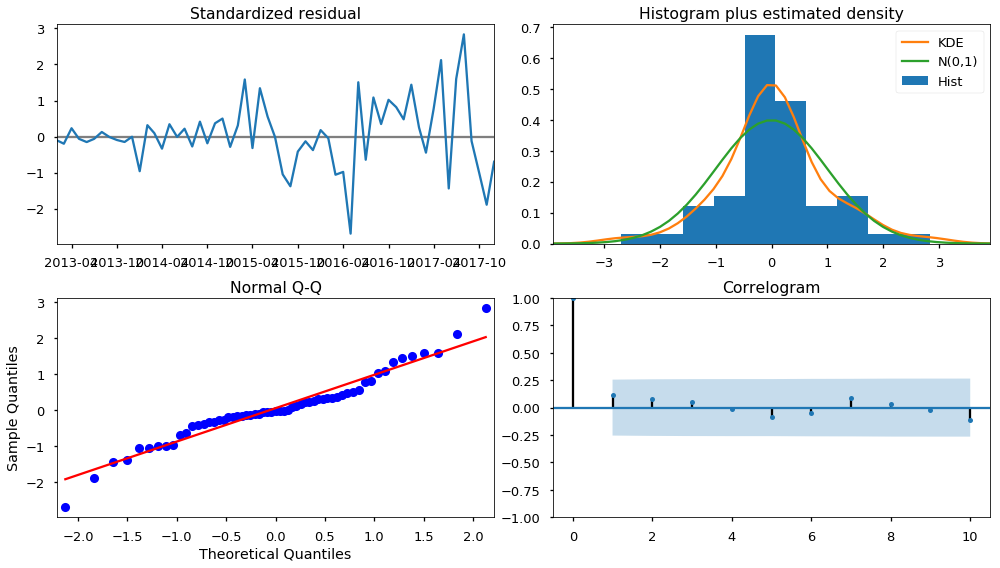

In [128]:
results.plot_diagnostics(figsize=(14, 8))
plt.tight_layout()
plt.show()

### Prediction

#### Predição um passo a frente

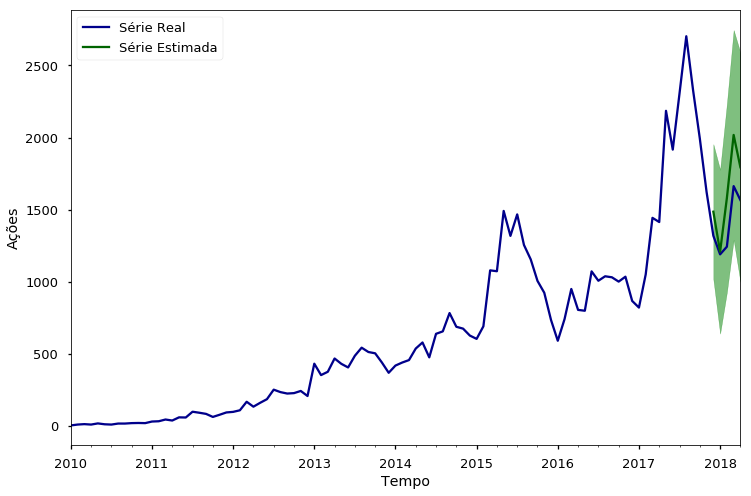

In [129]:
#predicted
pred = results.get_prediction(start=pd.to_datetime('2017-12-01'),
                             end=pd.to_datetime('2018-04-01'),
                             dynamic=True)
#intervalo de confianca
pred_ci = pred.conf_int()

#plot
plt.figure(figsize=(12,8))
ax = y[:-1].plot(label='Série Real', color='darkblue')
pred.predicted_mean.plot(ax=ax, label='Série Estimada', color='darkgreen');

#bandas do intervalo de confianca
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='green', alpha=0.5);

ax.set_xlabel('Tempo')
ax.set_ylabel('Ações')
plt.legend(loc='best');

##### Root Mean Square Error (RMSE)

Para medir o erro cometido pelo modelo calculamos o $RMSE$, assim temos uma medida na mesma unidade da variável de interesse.

<div style='text-align:center'>
$RMSE = \sqrt{\frac{1}{T} \sum_{t=1}^{T}(\hat{Z}_t-Z_t)^2}$
</div>


In [92]:
#To dataset test
rmse = np.sqrt(((pred.predicted_mean - y_test[:-1])**2).mean())
rmse

198.87069771809362

#### Previsão

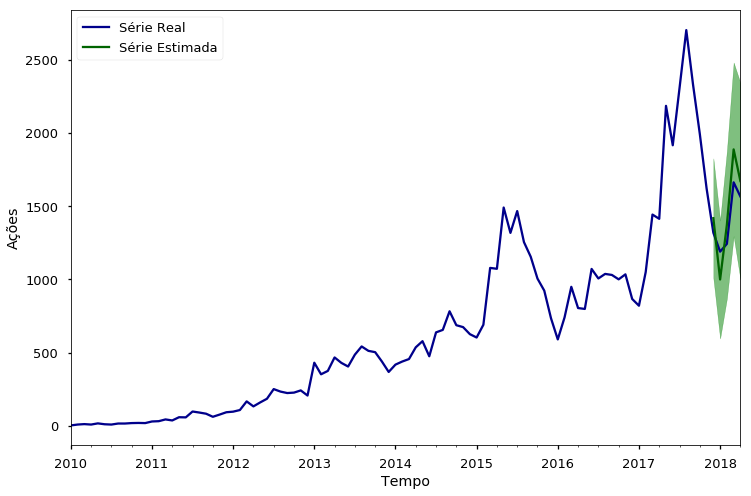

In [123]:
#predicted
pred_out = results.get_prediction(start=pd.to_datetime('2017-12-01'),
                             end=pd.to_datetime('2018-04-01'),
                             dynamic=False, full_results=True)
#intervalo de confianca
pred_ci_out = pred_out.conf_int()

#plot
plt.figure(figsize=(12,8))
ax = y[:-1].plot(label='Série Real', color='darkblue')
pred_out.predicted_mean.plot(ax=ax, label='Série Estimada', color='darkgreen');

#bandas do intervalo de confianca
ax.fill_between(pred_ci_out.index, pred_ci_out.iloc[:, 0], pred_ci_out.iloc[:, 1], color='green', alpha=0.5);
ax.set_xlabel('Tempo')
ax.set_ylabel('Ações')
plt.legend(loc='best');

In [105]:
#To dataset test
rmse_out = np.sqrt(((pred_out.predicted_mean - y_test[:-1])**2).mean())
rmse_out

157.73316413765829

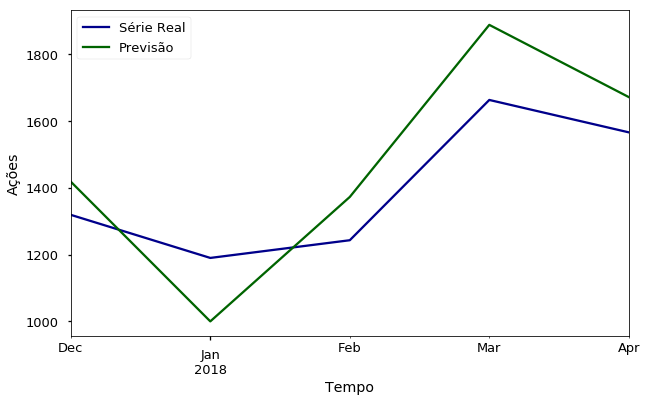

In [126]:
ax=y_test[:'2018-04-01'].plot(label='Série Real', color='darkblue', figsize=(10, 6))
pred_out.predicted_mean.plot(ax=ax,label='Previsão', color='darkgreen')
ax.set_xlabel('Tempo')
ax.set_ylabel('Ações')
plt.legend(loc='upper left');
plt.show()